In [92]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [93]:
directory_19 = r'F:\Ecobee\files\2019_sac'
for filename in os.listdir(directory_19):
    if filename.endswith(".zip"):
        print(os.path.join(directory_19, filename))
    else:
        continue

F:\Ecobee\files\2019_sac\0038e4cc0089e5a289601a79af4b6c6f2c9efc97.csv.zip
F:\Ecobee\files\2019_sac\00e2f68ec737f7480114a67bbef7c5f65b6b8516.csv.zip
F:\Ecobee\files\2019_sac\01479a9a84e1722791f2b440f6d4f14f51025499.csv.zip
F:\Ecobee\files\2019_sac\0150a428f7cc891b6a69cb7db390869c96a24f1d.csv.zip
F:\Ecobee\files\2019_sac\02dc9385bcf16019883895622d8af493de236faa.csv.zip
F:\Ecobee\files\2019_sac\056d5c424e32f57c5e9920c3032f0ea6114480ff.csv.zip
F:\Ecobee\files\2019_sac\05878f0c08adb8b334bf73c070b250a93ec7649d.csv.zip
F:\Ecobee\files\2019_sac\0614c5d47de23d61b21be2141907668a54bf45a0.csv.zip
F:\Ecobee\files\2019_sac\06a0129a67f74d87adb79c9d08975b563ab600ae.csv.zip
F:\Ecobee\files\2019_sac\06d89337caa78e3ed6e3591c9e22b8808a82c327.csv.zip
F:\Ecobee\files\2019_sac\0773f65bc76833bddd55f0f850ded5d14bc8ab99.csv.zip
F:\Ecobee\files\2019_sac\084a2b8c0522a36209d062d852d04bb64494ea84.csv.zip
F:\Ecobee\files\2019_sac\08a71736460f4b41fb6a69bd7d9194b907965809.csv.zip
F:\Ecobee\files\2019_sac\08fec65caff01

In [94]:
from zipfile import ZipFile
directory_18 = r'F:\Ecobee\files\2018_sac'
df_sac_18_daily_allday = pd.DataFrame()
hours_to_keep = [12, 13, 14, 15, 16, 20, 21, 22, 23]
import datetime
for filename in os.listdir(directory_18):
    myzip = ZipFile(os.path.join(directory_18, filename))
    g = myzip.open(filename[:-4])
    df_temp = pd.read_csv(g, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_18_daily_allday = pd.concat([df_sac_18_daily_allday, df_day])
    g.close()
    myzip.close()

In [95]:
df_sac_18_daily_allday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21249 entries, 0 to 121
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21249 non-null  object 
 1   daily_total_heating  21249 non-null  float64
 2   daily_total_cooling  21249 non-null  float64
 3   user_id              21249 non-null  object 
dtypes: float64(2), object(2)
memory usage: 830.0+ KB


In [96]:
pd.set_option('display.max_rows', None)
#remove user_ids that have no cooling consumption at all for 2018
df_18_temp=df_sac_18_daily_allday[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
df_18_temp['any_usage']=(df_18_temp.daily_total_cooling>0)
df_18_temp=df_18_temp['user_id'][df_18_temp['any_usage']==True]
df_sac_18_daily_allday=pd.merge(df_18_temp,df_sac_18_daily_allday,how='left', on='user_id')


In [97]:
df_sac_18_daily_allday.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,1.091667
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,3.195833
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,6.300000
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,4.370833
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,1.487500


In [98]:
from zipfile import ZipFile
df_sac_19_daily_allday = pd.DataFrame()
hours_to_keep = [12, 13, 14, 15, 16, 20, 21, 22, 23]
import datetime
for filename in os.listdir(directory_19):
    myzip = ZipFile(os.path.join(directory_19, filename))
    f = myzip.open(filename[:-4])
    df_temp = pd.read_csv(f, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_19_daily_allday = pd.concat([df_sac_19_daily_allday, df_day])
    f.close()
    myzip.close()

In [99]:
df_sac_19_daily_allday.head()
#note there is a "time jump" from 2019-07-25 16:55 to 2019-07-26 17:00

,Date,daily_total_heating,daily_total_cooling,user_id
0,2019-06-01,0.0,3.983333,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2019-06-02,0.0,2.575000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2019-06-03,0.0,1.262500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2019-06-04,0.0,5.404167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2019-06-05,0.0,3.045833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [100]:
pd.set_option('display.max_rows', None)
#remove user_ids that have no cooling consumption at all for 2019
df_19_temp=df_sac_19_daily_allday[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
df_19_temp['any_usage']=(df_19_temp.daily_total_cooling>0)
df_19_temp=df_19_temp['user_id'][df_19_temp['any_usage']==True]
df_sac_19_daily_allday=pd.merge(df_19_temp,df_sac_19_daily_allday,how='left', on='user_id')

In [101]:
df_sac_19_daily_allday.head(600)

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-01,0.000000,3.983333
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-02,0.000000,2.575000
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-03,0.000000,1.262500
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-04,0.000000,5.404167
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-05,0.000000,3.045833
5,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-06,0.000000,1.050000
6,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-07,0.000000,0.470833
7,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-08,0.000000,1.145833
8,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-09,0.000000,2.975000
9,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-10,0.000000,2.700000


In [102]:
df_sac_18n19_daily_allday=pd.concat([df_sac_18_daily_allday,df_sac_19_daily_allday])
df_sac_18n19_daily_allday.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,1.091667
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,3.195833
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,6.300000
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,4.370833
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,1.487500


In [103]:
df_sac_18n19_daily_allday['count'] = df_sac_18n19_daily_allday.groupby('user_id')['user_id'].transform('count')
df_sac_18n19_daily_allday['count'].value_counts().head()

244    30744
122    20008
243     1944
241      964
224      896
Name: count, dtype: int64

In [104]:
df_sac_18n19_daily_allday.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,1.091667,244
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,3.195833,244
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,6.300000,244
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,4.370833,244
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,1.487500,244


In [105]:
df_sac_18n19_daily_allday=df_sac_18n19_daily_allday[df_sac_18n19_daily_allday['count']==244]
df_sac_18n19_daily_allday['Date']=pd.to_datetime(df_sac_18n19_daily_allday['Date'])
df_sac_18n19_daily_allday.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,1.091667,244
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,3.195833,244
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,6.300000,244
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,4.370833,244
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,1.487500,244


In [106]:
df_sac_18n19_daily_allday.user_id.nunique()

126

In [107]:
df_temperature=pd.read_csv(r'F:\Ecobee\smf_temp_18and19.csv', parse_dates=['DATE'])
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  730 non-null    object        
 1   NAME     730 non-null    object        
 2   DATE     730 non-null    datetime64[ns]
 3   TAVG     730 non-null    int64         
 4   TMAX     730 non-null    int64         
 5   TMIN     730 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 34.3+ KB


In [108]:
df_temperature.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-01,49,65,38
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-02,48,59,39
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-03,50,57,40
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-04,55,65,49
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-05,55,60,50


In [109]:
df_sac_18n19_daily_allday_w_temperature=pd.merge(df_sac_18n19_daily_allday,df_temperature,how='left', left_on='Date', right_on='DATE')
df_sac_18n19_daily_allday_w_temperature.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,1.091667,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,3.195833,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,6.300000,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,4.370833,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,1.487500,244,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-05,67,84,53


In [110]:
df_sac_18n19_daily_allday_w_temperature['TAVG_less_62']=df_sac_18n19_daily_allday_w_temperature['TAVG']-62

In [111]:
df_sac_18n19_daily_allday_w_temperature['y2019']=np.where(df_sac_18n19_daily_allday_w_temperature['Date'].dt.year== 2019, 1, 0)
# [df_sac_18n19_daily_allday_w_temperature['Date'].dt.year==2019]
df_sac_18n19_daily_allday_w_temperature.describe()

,daily_total_heating,daily_total_cooling,count,TAVG,TMAX,TMIN,TAVG_less_62,y2019
count,30744.000000,30744.000000,30744.0,30744.000000,30744.000000,30744.000000,30744.000000,30744.000000
mean,0.001788,3.275137,244.0,72.741803,90.385246,58.508197,10.741803,0.500000
std,0.045872,3.328428,0.0,5.188633,7.225921,4.006711,5.188633,0.500008
min,0.000000,0.000000,244.0,58.000000,69.000000,45.000000,-4.000000,0.000000
25%,0.000000,0.408333,244.0,69.000000,86.000000,56.000000,7.000000,0.000000
50%,0.000000,2.508333,244.0,73.000000,91.000000,58.000000,11.000000,0.500000
75%,0.000000,5.000000,244.0,76.250000,96.000000,61.000000,14.250000,1.000000
max,4.775000,24.000000,244.0,86.000000,105.000000,69.000000,24.000000,1.000000


In [112]:
df_sac_18n19_daily_allday_w_temperature[
    'interaction'] = df_sac_18n19_daily_allday_w_temperature[
        'TAVG_less_62'] * df_sac_18n19_daily_allday_w_temperature['y2019']

In [113]:
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit(cov_type='HC1')
    return result.params


#This is what you need
results=df_sac_18n19_daily_allday_w_temperature.groupby('user_id').apply(
    regress, 'daily_total_cooling', ['TAVG_less_62','interaction']).reset_index()
results

,user_id,TAVG_less_62,interaction,intercept
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,0.331032,-0.119988,0.049275
1,00e2f68ec737f7480114a67bbef7c5f65b6b8516,0.350740,-0.033386,-1.177799
2,01479a9a84e1722791f2b440f6d4f14f51025499,0.219950,0.005360,0.311035
3,0150a428f7cc891b6a69cb7db390869c96a24f1d,0.146870,0.380282,-0.284087
4,0614c5d47de23d61b21be2141907668a54bf45a0,0.281434,0.296470,0.097577
5,06d89337caa78e3ed6e3591c9e22b8808a82c327,0.412819,0.064239,-1.942784
6,0773f65bc76833bddd55f0f850ded5d14bc8ab99,0.202071,-0.027080,-0.513156
7,084a2b8c0522a36209d062d852d04bb64494ea84,0.403723,-0.055518,-0.368379
8,0aec426e98899420452f505669f36b1f47651c68,0.372821,-0.139075,-0.950772
9,0f50223ca3a7c1def87d95d3696719692d5d3d33,0.306504,-0.070808,-0.444621


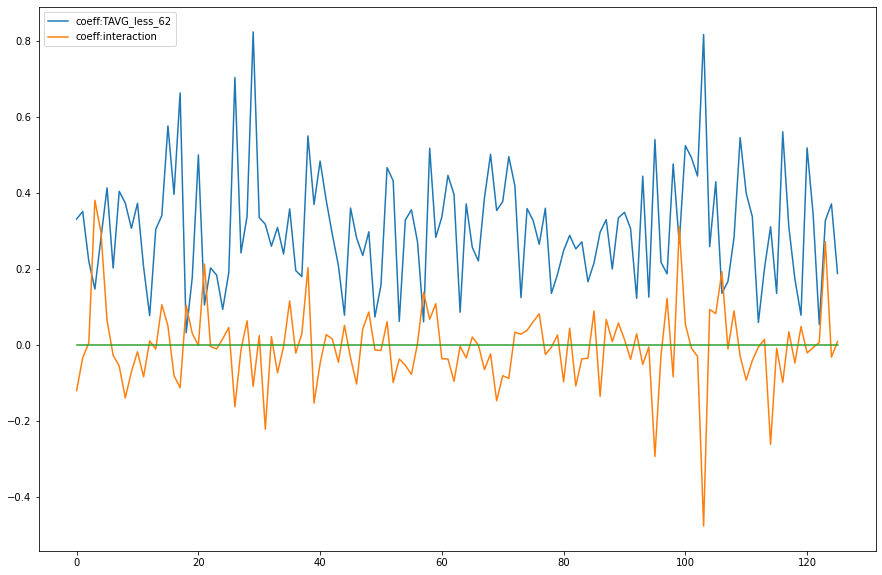

In [114]:
# x axis range
x = range(len(results))
plt.figure(figsize=(15,10))
# y2
plt.plot(x,results['TAVG_less_62'],label='coeff:TAVG_less_62')
# y2
plt.plot(x,results['interaction'],label='coeff:interaction')
# y=0 line 
plt.plot(x,[0] * len(results))
plt.legend(loc="upper left")

In [115]:
print(results[results.interaction > 0.01].count())
print(results[results.interaction < -0.01].count())

user_id         50
TAVG_less_62    50
interaction     50
intercept       50
dtype: int64
user_id         60
TAVG_less_62    60
interaction     60
intercept       60
dtype: int64


In [116]:
print(results['interaction'][results.interaction > 0.01].sum())
print(results['interaction'][results.interaction < -0.01].sum())
# the sum of negative interaction coefficients has a larger scale

4.279957295844627
-4.713318762973584


In [117]:
df_sac_18n19_daily_allday_w_temperature['const']=1
reg1 = sm.OLS(endog=df_sac_18n19_daily_allday_w_temperature['daily_total_cooling'], \
              exog=df_sac_18n19_daily_allday_w_temperature[['TAVG_less_62','interaction','const']], \
    missing='drop')
reg_result = reg1.fit(cov_type='HC1')
print(reg_result.summary())

                             OLS Regression Results                            
Dep. Variable:     daily_total_cooling   R-squared:                       0.226
Model:                             OLS   Adj. R-squared:                  0.226
Method:                  Least Squares   F-statistic:                     4288.
Date:                 Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                         00:03:59   Log-Likelihood:                -76647.
No. Observations:                30744   AIC:                         1.533e+05
Df Residuals:                    30741   BIC:                         1.533e+05
Df Model:                            2                                         
Covariance Type:                   HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TAVG_less_62     0.3077      0.004    